In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from tqdm import tqdm
import cv2

In [2]:
def load_calcium(filename):

    # Read the simulation results
    calcium = pd.read_hdf("../results/data/calcium/" + filename + ".h5")
    calcium = calcium.values.reshape(len(calcium), 60, 60)

    # Separate ectoderm and endoderm
    calcium_ecto = calcium[:, :30, :]
    calcium_endo = calcium[:, 30:, :]
    
    return calcium_ecto, calcium_endo

In [6]:
calcium_ecto, calcium_endo = load_calcium("2020-10-24-11-48-39-238705")

100%|██████████| 2000/2000 [02:57<00:00, 11.26it/s]


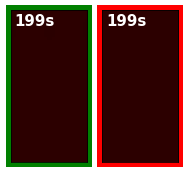

In [7]:
numx = 30
numy = 60
dpi = 100
fps = 200
savepath = '../results/videos/calcium/'

fig = plt.figure(figsize=(300/dpi, 300/dpi))

for iframe in tqdm(range(0, len(calcium_ecto), 5)):

    plt.clf()

    frame_ecto = calcium_ecto[iframe]
    frame_endo = calcium_endo[iframe]
    frame_ecto = np.flip(frame_ecto.T, 0)
    frame_endo = np.flip(frame_endo.T, 0)
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(frame_ecto, cmap='hot', vmin=0, vmax=1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.patch.set_edgecolor('g')  
    ax1.patch.set_alpha(1)
    ax1.patch.set_linewidth('10')  
    ax1.text(0.05, 0.9, str(int(iframe*0.02)) + 's', size=15, weight="bold", color='white', transform=ax1.transAxes)
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(frame_endo, cmap='hot', vmin=0, vmax=1)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.patch.set_edgecolor('r')  
    ax2.patch.set_alpha(1)
    ax2.patch.set_linewidth('10') 
    ax2.text(0.05, 0.9, str(int(iframe*0.02)) + 's', size=15, weight="bold", color='white', transform=ax2.transAxes)

    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

#     plt.xlim(0, numx)
#     plt.ylim(0, numy)
#     plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)

    plt.savefig(savepath + 'frames/img' + str(iframe) + '.jpg', dpi=dpi)


In [8]:
# Save video
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
videoWriter = cv2.VideoWriter(savepath + '/video.avi', fourcc, fps, (300, 300))

for iframe in tqdm(range(len(calcium_ecto))):
    frame = cv2.imread(savepath + 'frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()

100%|██████████| 10000/10000 [00:04<00:00, 2476.34it/s]
